# Time series correlations
### with and without a lag

This is a version of the earlier notebook (timeseries_lag) run on a corpus that is more carefully balanced by author.

Most of the earlier correlations disappear. On inspection, I tend to conclude that there's not actually a whole lot of systematic change in the genderedness of words *as ratios.* Most of the correlation we were seeing between bio and fiction may have been produced either

    1. By changes in the sheer frequency of words, which were the same across both corpora. Or

    2. By changes in the author-gender ratio, which paralleled each other across both corpora.

At this point that's just a hypothesis.

Since there's not very much diachronic (across-time) correlation between the corpora to begin with, the investigation of lag becomes mostly beside the point. There's still a fairly strong (r = .59) synchronic correlation between the mean gender-ratios of words in both corpora, measured across the vocabulary rather than across-time.


In [1]:
import os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline


In [3]:
relativepath = os.path.join('..', 'data', 'balanced_bio_logratio.csv')
bio = pd.read_csv(relativepath)

relativepath = os.path.join('..', 'data', 'balanced_fic_logratio.csv')
fic = pd.read_csv(relativepath)

In [4]:
bio.head()

,thedate,had,said,was,wrote,life,made,father,went,took,...,candidature,eloquent,conquer,dreaming,abounded,pity,proofs,session,was-capture,affiftance
0,1780.0,-4.260257,-3.720117,-3.991070,-2.871293,-3.590827,-3.489509,-3.629146,-2.128821,-3.553687,...,2.359816,2.359816,2.359816,2.359816,2.359816,2.359816,2.359816,2.359816,2.359816,2.359816
1,1781.0,-5.104505,2.832870,-4.208542,-3.712480,-4.017256,-3.713915,-2.542408,-2.337614,-2.978271,...,2.832870,2.832870,2.832870,2.832870,2.832870,2.832870,2.832870,2.832870,2.832870,-1.811521
2,1782.0,-5.193846,2.124694,-4.626408,-2.671097,-3.388735,-4.568630,-3.364244,-3.396767,-3.384695,...,2.124694,2.124694,2.124694,2.124694,2.124694,2.124694,2.124694,2.124694,2.124694,-2.687491
3,1783.0,-5.186660,-4.426898,-4.268516,-2.397641,-2.865383,-3.708088,-2.109959,-3.293237,-3.232382,...,3.407494,3.407494,3.407494,3.407494,3.407494,0.411762,3.407494,3.407494,3.407494,-0.281385
4,1784.0,-5.417801,-1.474392,-4.830127,-2.674007,-3.327060,-3.432648,-2.797114,-2.838707,-3.101072,...,2.759715,2.759715,2.759715,2.759715,2.759715,2.759715,-0.674273,2.759715,2.759715,-0.736793


In [5]:
fic.head()

,thedate,said,had,was,eyes,face,looked,thought,head,hand,...,abused,principal,braids,compose,unwrapped,mien,brilliant,improvement,occasioned,wood
0,1780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1781.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1782.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Getting shared words

This code is basically stolen from Natalie.

In [12]:
bio_list = list(bio.columns.values)
fic_list = list(fic.columns.values)
shared_words = set(fic_list).intersection(set(bio_list))
shared_list = list(shared_words)
shared_list.pop(shared_list.index('thedate'))
fic = fic[(fic.thedate > 1799) & (fic.thedate < 2001)]
bio = bio[(bio.thedate > 1799) & (bio.thedate < 2001)]
fic_subset = fic[list(shared_list)]
bio_subset = bio[list(shared_list)]
print(fic_subset.shape)
print(bio_subset.shape)

(201, 4370)
(201, 4370)


In [14]:
word = 'hair'
r, p = pearsonr(fic_subset[word], bio_subset[word])
print(r, p)

0.1277344075 0.0707524849564


word? mother


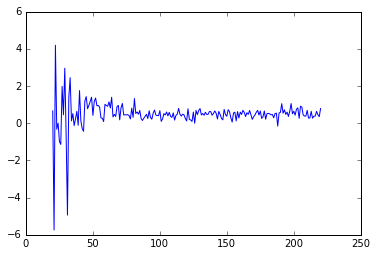

In [29]:
word = input('word? ')
plt.plot(fic_subset[word])

word? pistol


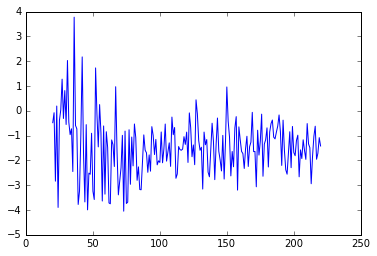

In [30]:
word = input('word? ')
plt.plot(fic_subset[word])

### Fisher's transform: averaging correlation coefficients

Defining a function to average r values.

In [15]:
def fisher_average(listofrvals):
    zscores = (np.arctanh(listofrvals))
    avg_z = sum(zscores) / len(zscores)
    transformed_r = np.tanh(avg_z)
    naive_r = sum(listofrvals) / len(listofrvals)
    
    return transformed_r, naive_r
    

### Measuring correlations without lag

An initial pass on calculating the correlation between two time series for each word:

**a)** genderedness-across-time in fiction and

**b)** genderedness-across-time in biography.

In [16]:
# Let's calculate correlations for each word across time

r_list = []
significant = 0

for w in shared_list:
    r, p = pearsonr(fic_subset[w], bio_subset[w])
    r_list.append(r)
    if (p / 2) < 0.05 and r > 0:
        significant += 1
    # The scipy function reports a two-tailed p-value
    # But we are clearly expecting positive correlations
    # and wouldn't consider negative ones as significant.
    # So I'm dividing p by 2 to convert to a one-tailed test.

print(significant)
print(fisher_average(r_list))

444
(-0.0051266793949580163, -0.0050882088015769865)


Wow, that's not very much correlation at all!

### Correlations with lag

Let's try sliding the time series by as much as 12 years either way. Of course, when we shift the time series relative to each other, the area of overlap in the middle will be *smaller* than the original timeline. In order to make an apples-to-apples comparison between time series of the same length, we'll need to cut something off the end of the time series even when we're just shifting them zero, or one years, relative to each other. In other words, if we want to compare the central overlap between two time series shifted 12 years relative to each other, we need to compare it to an unshifted pairing *that has twelve years taken off either end.*

Trimming the ends is potentially a complicating factor, since the ends of the timeline might be inherently less (or more) likely to correlate. We can partly address this by running the shift comparison several times, with a different "ceiling" on the shift each time. I.e., the first time we'll shift a maximum of two years and That way we can see which differences are due to considering a smaller timeline, and which differences are due to the shift itself.


2
3
4
5
6
7
8
9
10
11
12
13
14


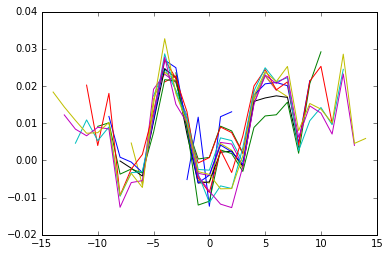

In [17]:
def shifted_correlation(vectora, vectorb, shift_ceiling, shift):
    
    assert len(vectora) == len(vectorb)
    maxlen = len(vectora)
    floor = shift_ceiling
    ceiling = maxlen - shift_ceiling
    floorb = floor + shift
    ceilingb = ceiling + shift
    slicea = vectora[floor : ceiling]
    sliceb = vectorb[floorb : ceilingb]
    return pearsonr(slicea, sliceb)

the_correlations = dict()
# we're going to create a different dictionary entry
# for each "shift-ceiling"

for shift_ceiling in range(2, 15):
    print(shift_ceiling)
    
    shifts = []
    correlations = []
    
    for shift in range(-shift_ceiling, shift_ceiling + 1):
        temp_r = []
        significant = 0

        for w in shared_list:
            r, p = shifted_correlation(fic_subset[w], bio_subset[w], shift_ceiling, shift)
            temp_r.append(r)
            if (p / 2) < 0.05 and r > 0:
                significant += 1

        true_avg, naive_avg = fisher_average(temp_r)
        shifts.append(shift)
        correlations.append(true_avg)
    
    the_correlations[shift_ceiling] = list(zip(shifts, correlations))
    
    # we save a list of tuples where x[0] = shift and x[1] = avg corr

for sc in range(2,15):
    x, y = zip(*the_correlations[sc])
    plt.plot(x, y)

plt.show()

#### Interpretation.

I interpret that as essentially meaningless noise. We could test by running other random samples from the underlying corpus.



20
40
60
80


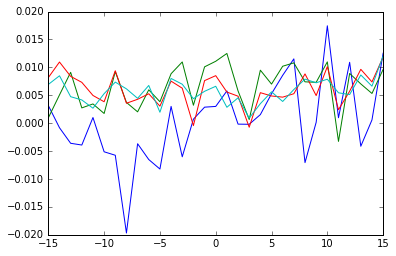

In [18]:
import math

def correlate_arbitrary_slice(vectora, vectorb, shift, absolute_floor):
    
    assert len(vectora) == len(vectorb)
    maxlen = len(vectora)
    floor = absolute_floor
    ceiling = absolute_floor + 100
    floorb = floor + shift
    ceilingb = ceiling + shift
    slicea = vectora[floor : ceiling]
    sliceb = vectorb[floorb : ceilingb]
    
    return pearsonr(slicea, sliceb)

the_correlations = dict()
# we're going to create a different dictionary entry
# for each "shift-ceiling"

for absolute_floor in range(20, 100, 20):
    print(absolute_floor)
    shift_ceiling = 15
    shifts = []
    correlations = []
    
    for shift in range(-shift_ceiling, shift_ceiling + 1):
        temp_r = []
        significant = 0

        for w in shared_list:
            r, p = correlate_arbitrary_slice(fic_subset[w], bio_subset[w], shift, absolute_floor)
            if not math.isnan(r):
                temp_r.append(r)
            if (p / 2) < 0.05 and r > 0:
                significant += 1

        true_avg, naive_avg = fisher_average(temp_r)
        shifts.append(shift)
        correlations.append(true_avg)
    
    the_correlations[absolute_floor] = list(zip(shifts, correlations))
    
    # we save a list of tuples where x[0] = shift and x[1] = avg corr

for af in range(20, 100, 20):
    x, y = zip(*the_correlations[af])
    plt.plot(x, y)

plt.show()

### Not much pattern, except that the correlation is weakest in the early period.

Having inspected the time series, I think the correlation 1800-1820 is thrown off by the small data size in that period. It gets stronger when you're just looking at the rest of the timeline. **But it's never very strong, and that's the significant thing.**


In [28]:
for af in range(20, 100, 20):
    x, y = zip(*the_correlations[af])
    meancorr = sum(y) / len(y)
    print("From " + str(1780 + af) + " to " + str(1780 + af + 100) + ": " + str(meancorr))

From 1800 to 1900: 0.000461281554188
From 1820 to 1920: 0.00651740223338
From 1840 to 1940: 0.00612158031974
From 1860 to 1960: 0.00577648458222


It was clearly a good thing that we rebalanced the corpora.

### Calculating means

code stolen from Natalie

This gets more interesting. Some, but not all, of the gender-asymmetry we noticed earlier goes away. Since the main change in the corpus, synchronically, has been to increase the prominence of women writers, this suggests to me that the asymmetry was mostly caused by asymmetrical treatment of gender **by male writers.**

In [23]:
bio_mean = bio_subset.mean(axis=0).reset_index()
bio_mean.columns = ['word', 'bio_mean']
fic_mean = fic_subset.mean(axis=0).reset_index()
fic_mean.columns = ['word', 'fic_mean']
means_df = pd.DataFrame(bio_mean).merge(pd.DataFrame(fic_mean), on='word', how='inner')
means_df.head()

,word,bio_mean,fic_mean
0,ball,0.193674,0.045195
1,mother-in-law,0.572344,0.176049
2,was-advising,-0.501734,-0.151942
3,pretensions,-0.669961,-0.276206
4,telegraphed,-0.564417,-0.233758


In [24]:
means_df.sort_values(by='fic_mean', ascending=False).head(10)

,word,bio_mean,fic_mean
2925,grandmother,0.555747,0.878193
2130,curls,0.751536,0.863470
1024,baby,1.042590,0.856388
1596,girls,0.936755,0.768729
4249,dresses,0.744091,0.751931
445,flowers,0.518262,0.743117
2948,cousins,0.510479,0.725368
557,thankful,0.360693,0.714115
1789,sisters,0.731984,0.713474
2235,bonnet,0.456057,0.707669


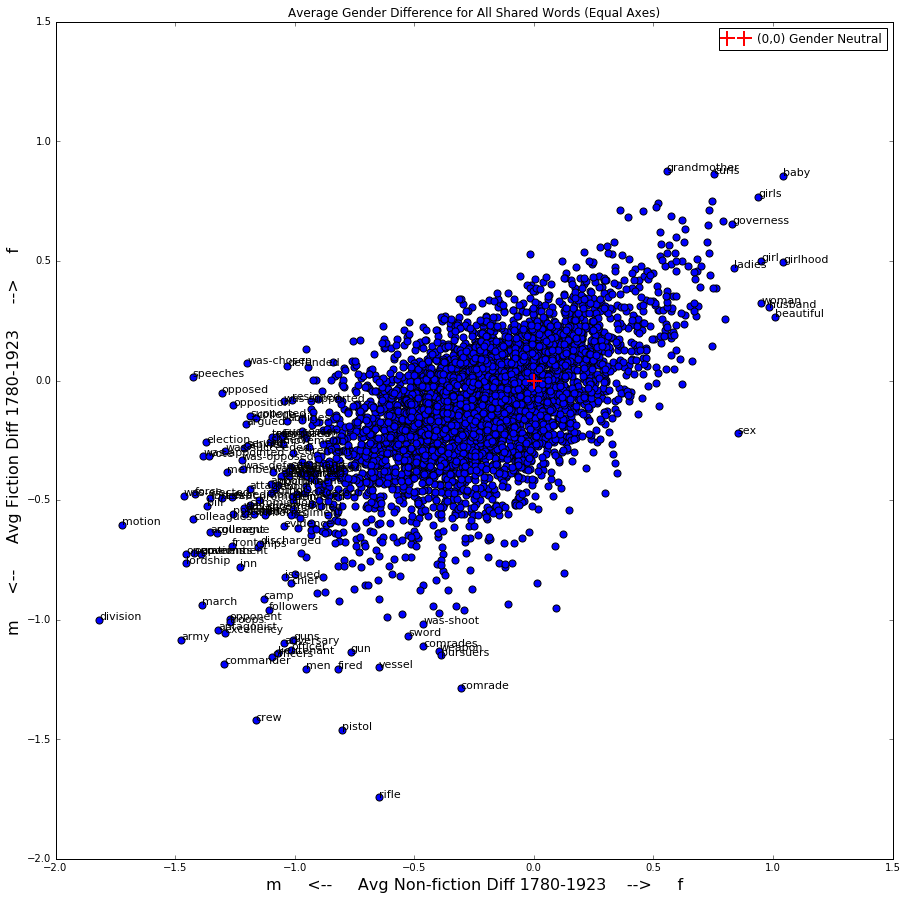

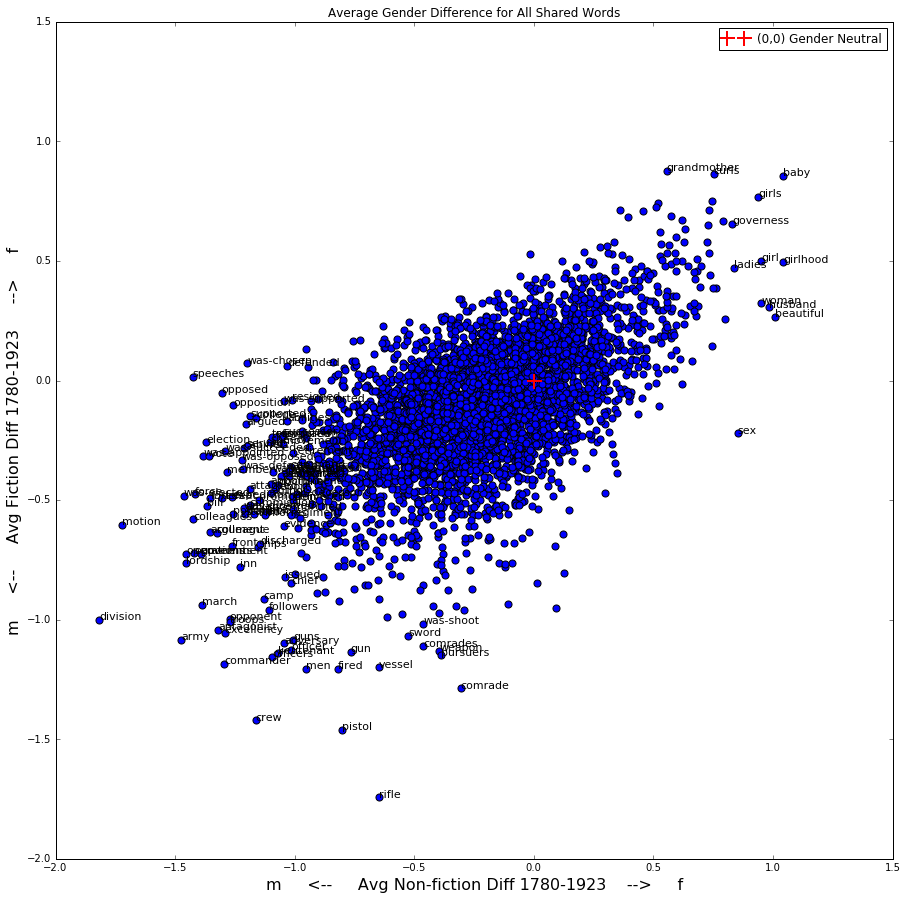

In [26]:
all_words = list(means_df.word.unique())
len(all_words)

def plot_diff_means(words, adjust=False, title=False, label_outliers=False, normalize_axes=False, save=False):
    df = means_df.loc[(means_df.word.isin(words)),:]
    ax0 = df.plot('bio_mean', 'fic_mean', kind='scatter', s=50, figsize=(15,15))
    ax0.plot(0, 0, 'r+', ms=15, mew=2, label='(0,0) Gender Neutral')
    
    texts = []
    for x, y, s in zip(df['bio_mean'], df['fic_mean'], df['word']):
        if label_outliers:
            if ((-1 < x < 0.8) == False) | ((-1 < y < 0.8) == False):
                texts.append((x, y, s))
    
    plt.legend(loc='best')
    plt.xlabel('m     <--     Avg Non-fiction Diff 1780-1923    -->     f', fontsize=16, )
    plt.ylabel('m     <--     Avg Fiction Diff 1780-1923     -->     f', fontsize=16)
    if title:
        plt.title(title)
    if normalize_axes:
        ylim = ax0.get_ylim()
        xlim = ax0.get_xlim()
        new_low = min(xlim[0], ylim[0])
        new_hi = max(xlim[1], ylim[1])
        plt.ylim(new_low, new_hi)
        plt.xlim(new_low, new_hi)
    
    if label_outliers:
        for x, y, label in texts:
            plt.annotate(label, xy=(x, y), size = 11)
    
    if save:
        if title:
            plt.savefig('./{}.png'.format(title))
        else:
            plt.savefig('./genderDiffMeans.png')
    plt.show()
    
plot_diff_means(all_words, adjust=True, title="Average Gender Difference for All Shared Words (Equal Axes)", label_outliers=True, normalize_axes=True, save=True)
plot_diff_means(all_words, adjust=True, title="Average Gender Difference for All Shared Words", label_outliers=True, normalize_axes=False, save = True)

In [27]:
pearsonr(means_df['bio_mean'], means_df['fic_mean'])

(0.59221546137948811, 0.0)